### Task 2.2 Supervised preprocessing and visualization

- Load dataset (diabetes.csv)
  - Use `pandas.read_csv()`
- Define and apply IQR-based outlier detection
  - Compute IQR (Q3 - Q1) for numerical features
  - Mark values outside [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] as outliers
- Replace outliers with NA and select complete cases
  - Use `numpy.nan` to replace outliers
  - Drop rows with missing values using dropna()
  - Consider the meaning of zeros before removal
- [Optional] Describe single features
  - Use pandas.describe() for summary statistics
- Rank features using Chi-squared statistics
  - Use chi2 from sklearn.feature_selection
  - Identify the most and least discriminating features
- Create boxplot and distribution plots
  - Use seaborn.boxplot() for boxplots
  - Use seaborn.histplot() or matplotlib.pyplot.hist() for distribution plots
  - Compare the highest and lowest ranked features
- Update Git repository
  - Run `git add`, `git commit -m "Feature selection and visualization"`, `git push` in the terminal

In [86]:
import pandas as pd
import numpy as np 
import seaborn as sb
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv('./assets/diabetes.csv')

data.describe()

,preg,plas,pres,skin,insu,mass,pedi,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [73]:
numeric_cols = data.select_dtypes(include='number').columns


We now iterate over the dataset (column-wise) and set the rows that are outside the lower and upper boundary to nan in order to be able to remove them later.

In [74]:
for col in numeric_cols:

    currentCol = data[col]

    Q1 = np.percentile(data[col], 25, method = 'midpoint') 
    Q2 = np.percentile(data[col], 50, method = 'midpoint') 
    Q3 = np.percentile(data[col], 75, method = 'midpoint') 

    IQR = Q3 - Q1 

    lower_boundary = Q1 - IQR * 1.5
    upper_boundary = Q3 + IQR * 1.5

    data.loc[(data[col] < lower_boundary) | (data[col] > upper_boundary), col] = np.nan

In [76]:
print("with outliers: ", data.shape)

numeric_data_cleaned = data.dropna()

print("without outliers: ", numeric_data_cleaned.shape)

with outliers:  (768, 9)
without outliers:  (639, 9)


In [77]:
numeric_data_cleaned.describe()

,preg,plas,pres,skin,insu,mass,pedi,age
count,639.000000,639.000000,639.000000,639.000000,639.000000,639.00000,639.000000,639.000000
mean,3.804382,119.112676,72.120501,20.563380,65.931142,32.00579,0.429177,32.715180
std,3.260995,29.162175,11.348686,15.339991,79.569482,6.43397,0.250957,11.080651
min,0.000000,44.000000,38.000000,0.000000,0.000000,18.20000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.30000,0.242000,24.000000
50%,3.000000,114.000000,72.000000,23.000000,37.000000,32.00000,0.358000,29.000000
75%,6.000000,137.000000,80.000000,32.000000,120.000000,35.95000,0.586000,40.000000
max,13.000000,198.000000,106.000000,60.000000,318.000000,50.00000,1.191000,66.000000


Firstly, we need to convert categorical features to binary features. We can then separate the features from the target (tested positive, tested negative). As Chi2 requires non-negative values, we need to scale the features. Lastly, wen can apply Chi2 feature selection and save the results in a DataFrame.

In [ ]:
scaler = MinMaxScaler()

x = numeric_data_cleaned.drop('class', axis=1)
y = numeric_data_cleaned['class']

x_scaled = scaler.fit_transform(x)

chi2_scores, p_values = chi2(x_scaled, y)

  Feature  Chi2 Score   p-value
0    plas   11.388388  0.000739
1     age   10.304719  0.001327
2    preg    7.130373  0.007579
3    mass    4.365088  0.036683
4    pedi    3.296525  0.069427
5    insu    1.840731  0.174865
6    pres    1.189877  0.275354
7    skin    0.114502  0.735076


We can see that the most disciminating features (the ones with the highest Chi2 score) is `plas` and the least discriminating features is `pres`.

In [85]:
df_chi2 = pd.DataFrame({
    'Feature': x.columns,
    'Chi2 Score': chi2_scores,
    'p-value': p_values
}).sort_values(by='Chi2 Score', ascending=False).reset_index(drop=True)

df_chi2

,Feature,Chi2 Score,p-value
0,plas,11.388388,0.000739
1,age,10.304719,0.001327
2,preg,7.130373,0.007579
3,mass,4.365088,0.036683
4,pedi,3.296525,0.069427
5,insu,1.840731,0.174865
6,pres,1.189877,0.275354
7,skin,0.114502,0.735076


Text(0.5, 1.0, 'Boxplot for highest ranking feature')

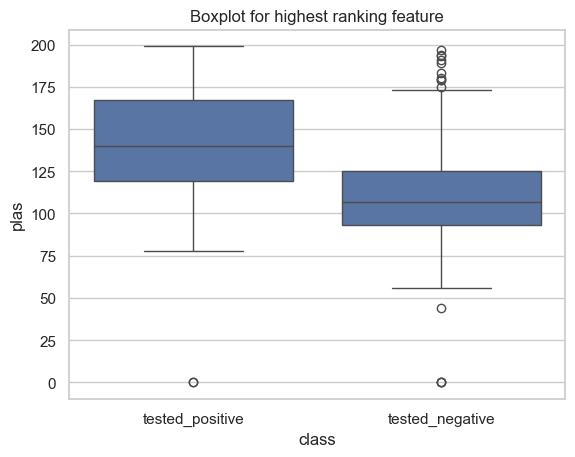

In [121]:
sb.set_theme(style='whitegrid')

boxplot = sb.boxplot(data=data, y="plas", x="class")
boxplot.set_title("Boxplot for highest ranking feature")

Text(0.5, 1.0, 'Histogram for highest ranking feature')

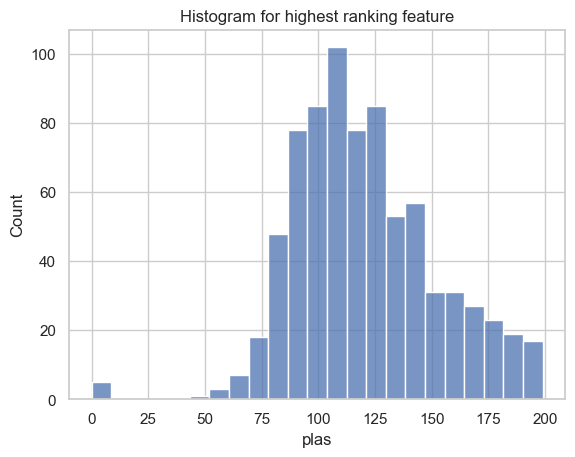

In [122]:
histplot = sb.histplot(data=data, x="plas")
histplot.set_title("Histogram for highest ranking feature")

Text(0.5, 1.0, 'Boxplot for lowest ranking feature')

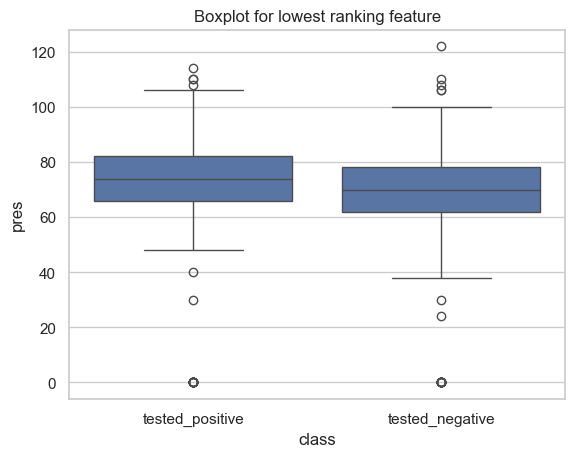

In [123]:
boxplot = sb.boxplot(data=data, y="pres", x="class")
boxplot.set_title("Boxplot for lowest ranking feature")

Text(0.5, 1.0, 'Histogram for lowest ranking feature')

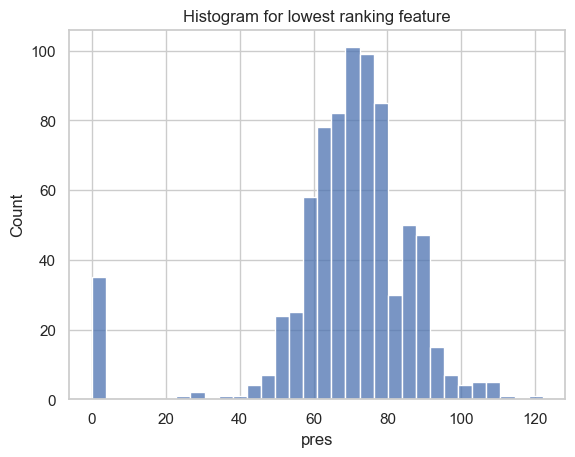

In [124]:
histplot = sb.histplot(data=data, x="pres")
histplot.set_title("Histogram for lowest ranking feature")